In [1]:
import h5py
from gqp_mc import data as Data 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib import colors as c

In [2]:
NUM_GAL = 10 #Number of galaxies
DATA_DIR = '/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ifsps/'
N_WALKERS = 10 #Number of walkers
N_RUN = 10000 #Number of runs
font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 16,
        }

In [3]:
def opener(name_preset,lower_dir):
    #lower dir: spec_bgs0/, spec_none/
    gal = []
    for idx in range(NUM_GAL):
        name = name_preset+str(idx)+".hdf5"
        f = h5py.File(DATA_DIR+lower_dir+name,'r')
        gal.append(f)
        
    return gal

In [4]:
spec_bgs0 = opener("lgal.spec.noise_bgs0.vanilla.",'spec_bgs0/') #list containing all the hdf5 files for the galaxies
spec_none = opener("lgal.spec.noise_none.vanilla.",'spec_none/')

In [5]:
specs,meta = Data.Spectra(sim='lgal',noise = 'bgs0', lib = 'bc03', sample = 'mini_mocha')
print(meta.keys())

dict_keys(['galid', 't_lookback', 'sfh_disk', 'sfh_bulge', 'Z_disk', 'Z_bulge', 'logM_disk', 'logM_bulge', 'logM_total', 't_age_MW', 'Z_MW', 'redshift', 'cosi', 'tau_ism', 'tau_bc', 'vd_disk', 'vd_bulge', 'logM_fiber', 'airmass', 'moon_alt', 'moon_ill', 'moon_sep', 'seeing', 'sun_alt', 'sun_sep', 'texp_total', 'transp', 'wave_sky', 'sbright_sky'])


In [6]:
input_mass = meta['logM_total'][:NUM_GAL]

In [7]:
def data(specs):
    data = []
    for spec in specs:
        data.append(spec['mcmc_chain'][...][:,0])
    return data

In [8]:
sb_mass = data(spec_bgs0) #list of inferred masses for each galaxy with bgs0 noise
sn_mass = data(spec_none) #list of inferred masses for each galaxy without noise

In [19]:
def hist_plotter(spec_photo,gal_idx,sample,step = 1000):
    plt.figure(figsize=(12,9))
    colors = plt.cm.copper_r(np.linspace(0,1,100))
    for n in range(100): #plotting histograms 1000, 2000, 3000, ... 100000
        hist = plt.hist(sample[:(1+n)*step],bins=50,histtype='step',color=colors[n],density='True',linewidth=1.2)
        plt.xlabel('$log M*$',fontdict=font)
        plt.ylabel('Frequency',fontdict=font)
    plt.title(spec_photo + ' $galaxy #$'+str(gal_idx),fontdict=font)
    norm = c.Normalize(vmin=1,vmax=100000) #Upper and lower boundaries for the color bar
    cbar = plt.colorbar(cm.ScalarMappable(norm = norm, cmap=cm.copper_r)) #Set 
    plt.savefig(spec_photo + ' galaxy #' +str(gal_idx) +' histogram')
    plt.show()

In [20]:
def perc_plotter(spec_photo,gal_idx,sample,step=1000):
    plt.figure(figsize=(12,9))
    n_it = N_WALKERS*NUM_GAL
    x_axis = np.arange(n_it)*1000
    y,up_perc,lo_perc=[],[],[]

    for n in range(100):
        up_perc.append(np.percentile(sample[:step*(1+n)],84.1)) #1000, 2000, 3000, ... 100000
        lo_perc.append(np.percentile(sample[:step*(1+n)],15.9))
        y.append(np.median(sample[:step*(1+n)]))
        
    up_perc = np.subtract(up_perc,y)
    lo_perc = np.subtract(y,lo_perc)
    yerr = np.vstack((lo_perc,up_perc))
    plt.xlabel('$N_{iteration}$',fontdict=font)
    plt.ylabel('Median',fontdict=font)
    plt.title(spec_photo + ' $galaxy #$' + str(gal_idx) + ' convergence schematic',fontdict=font)
    plt.errorbar(x_axis,y,yerr=yerr,fmt='.k',ecolor='gray', elinewidth=1)
    plt.savefig(spec_photo + ' galaxy #' + str(gal_idx) + ' convergence schematic')
    plt.show()

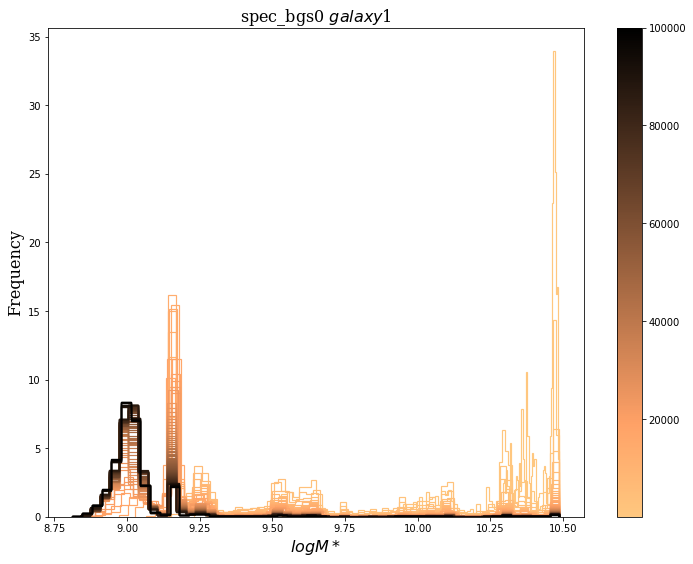

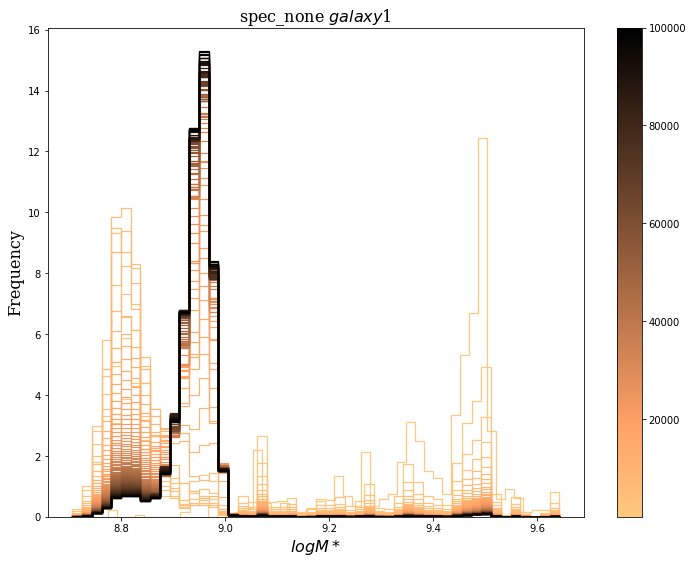

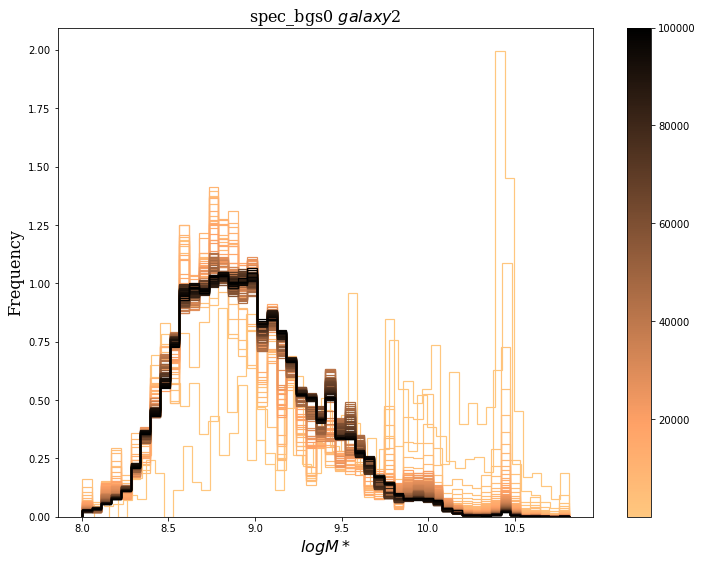

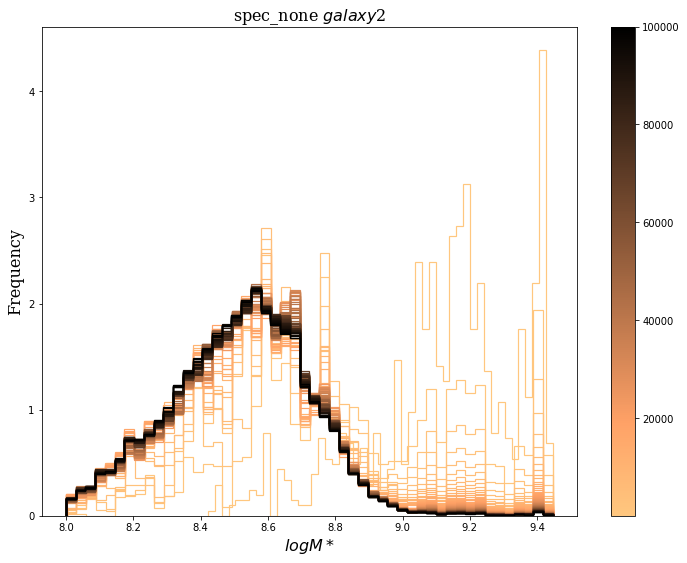

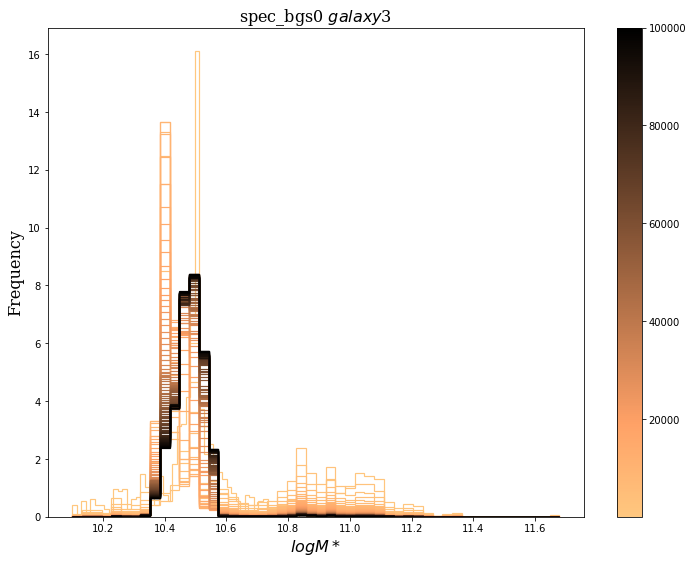

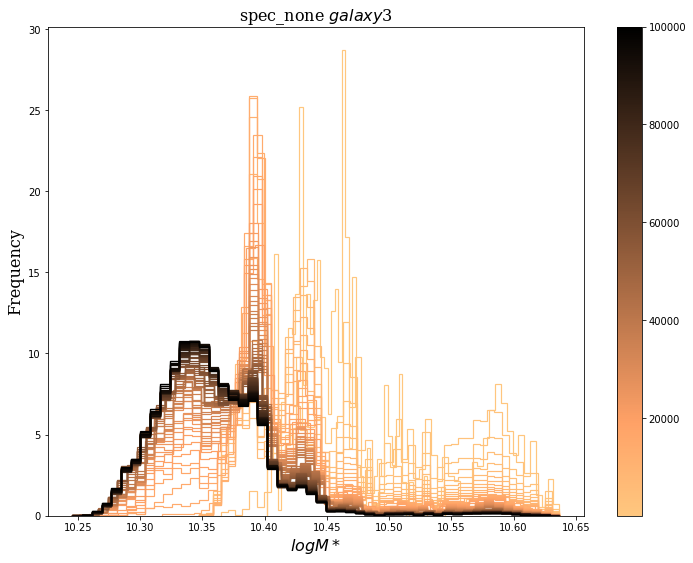

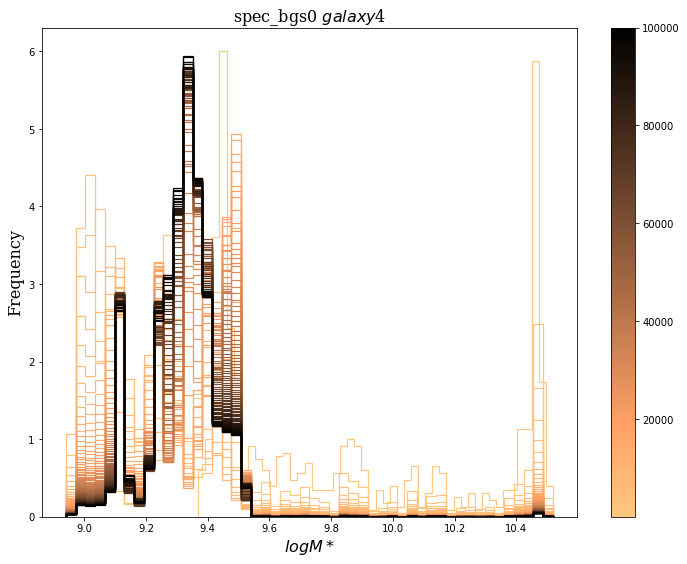

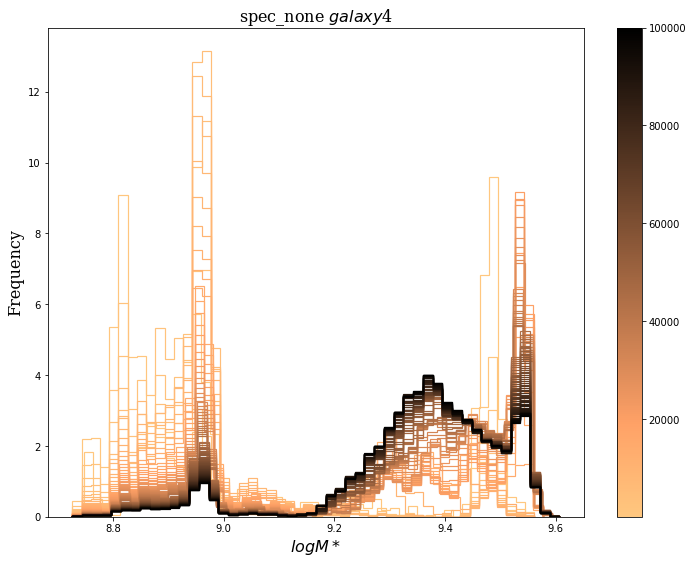

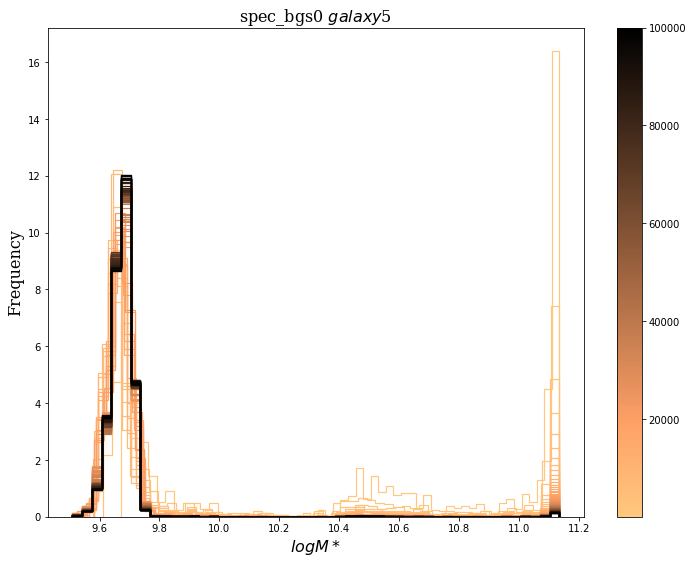

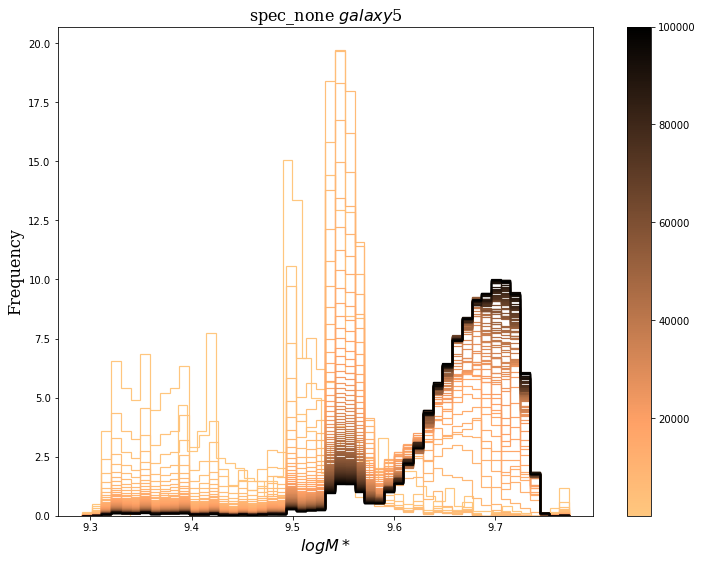

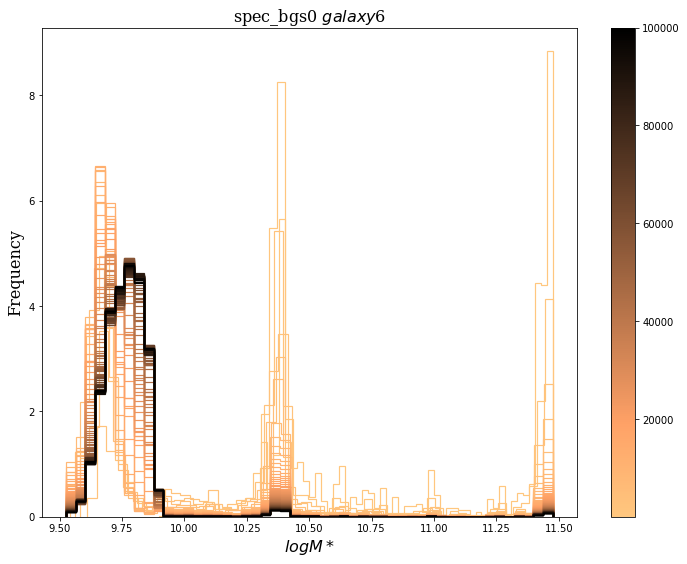

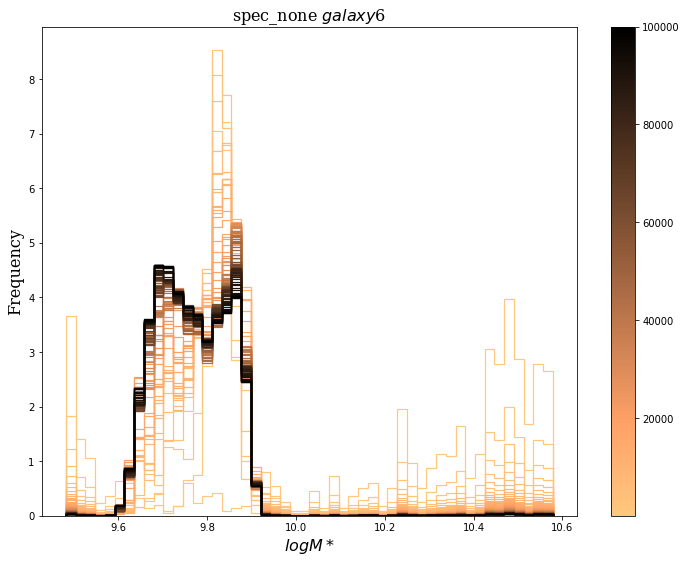

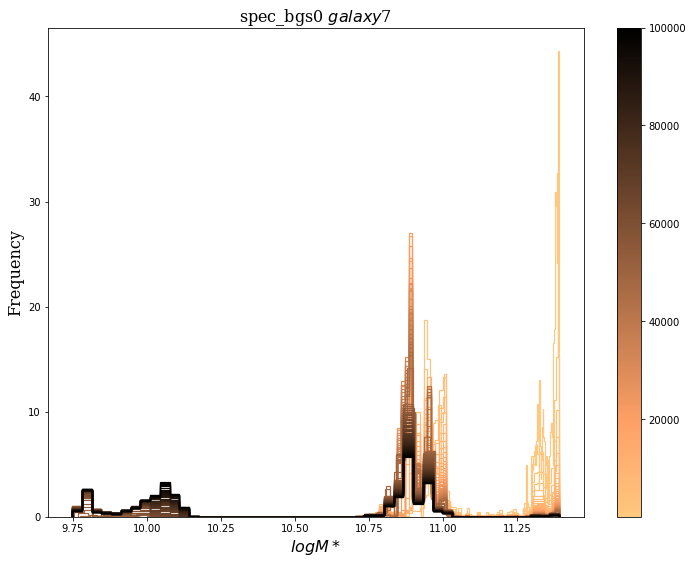

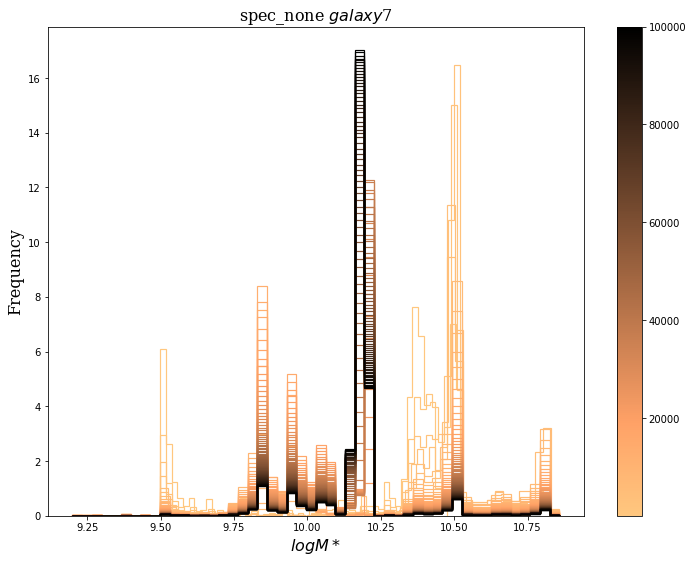

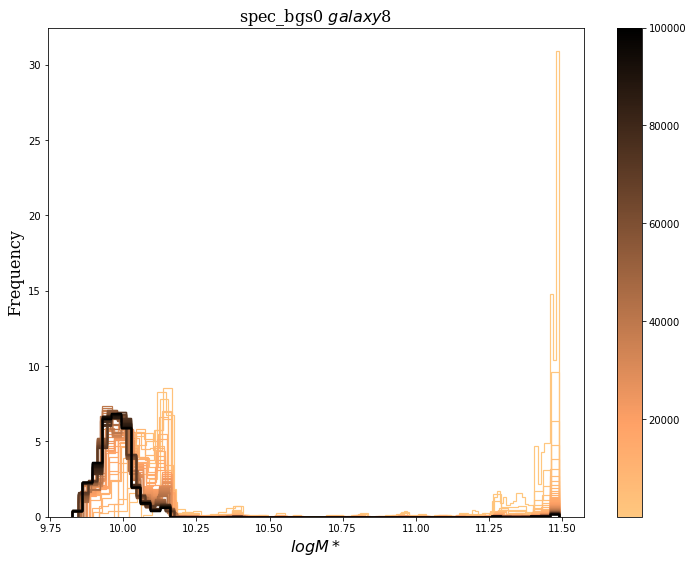

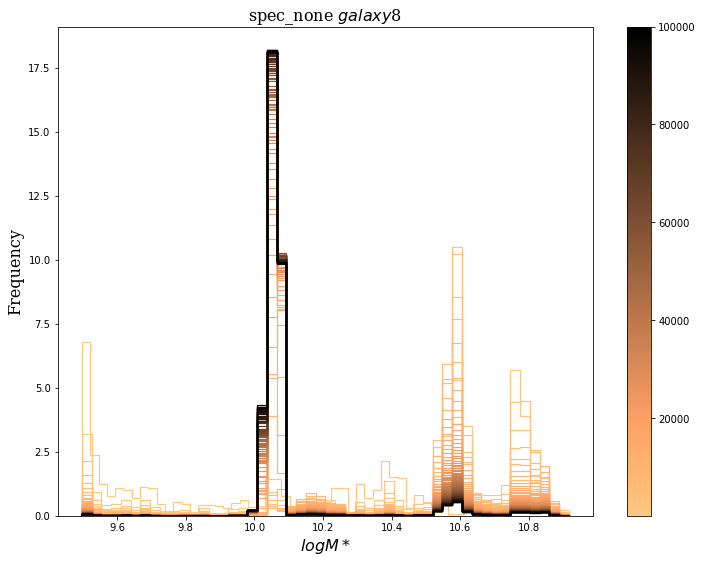

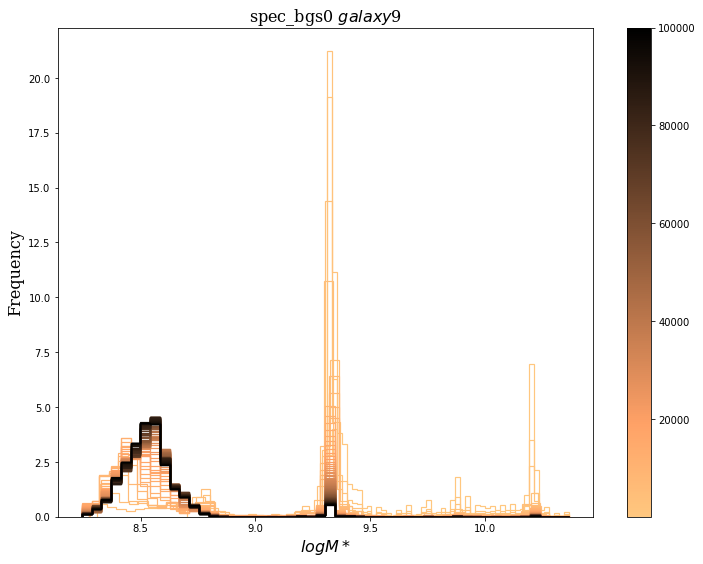

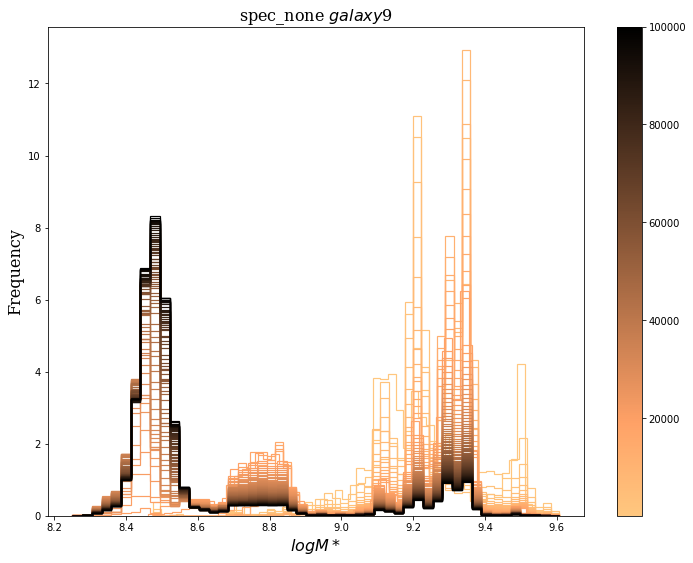

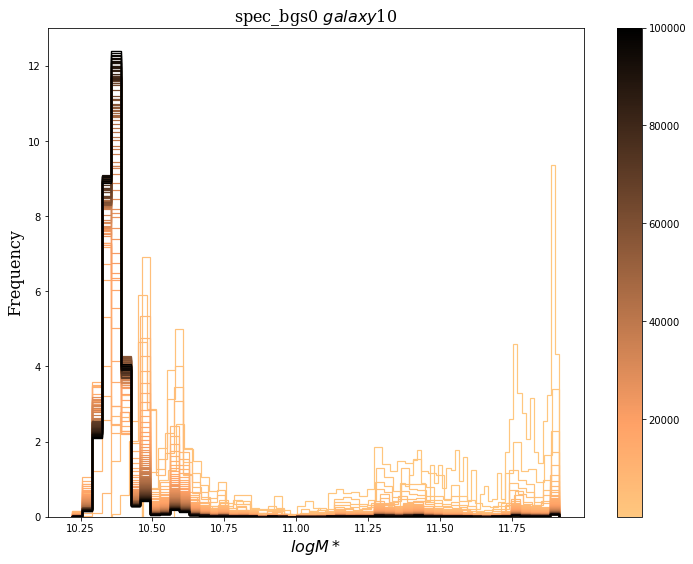

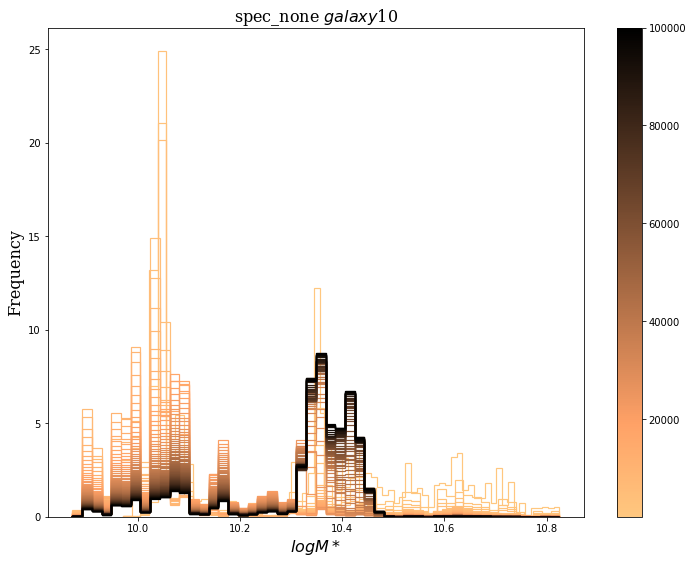

In [21]:
for idx in range(NUM_GAL):
    hist_plotter('spec_bgs0',idx+1,sb_mass[idx])
    hist_plotter('spec_none',idx+1,sn_mass[idx])

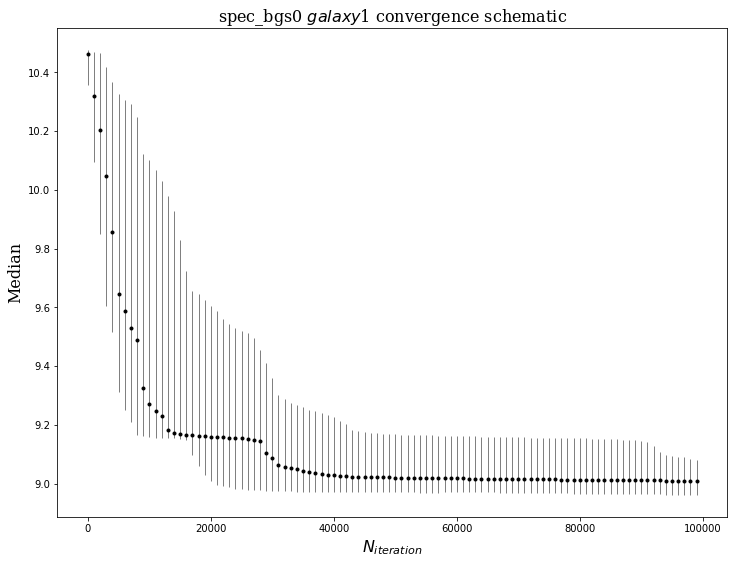

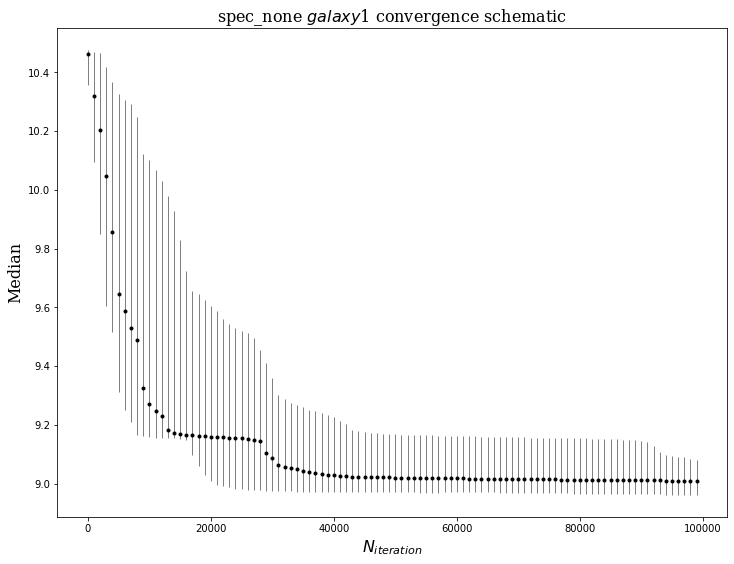

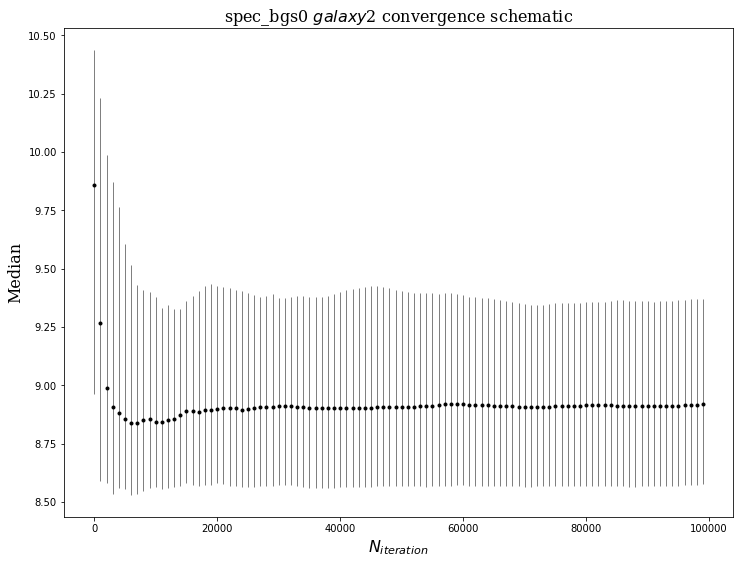

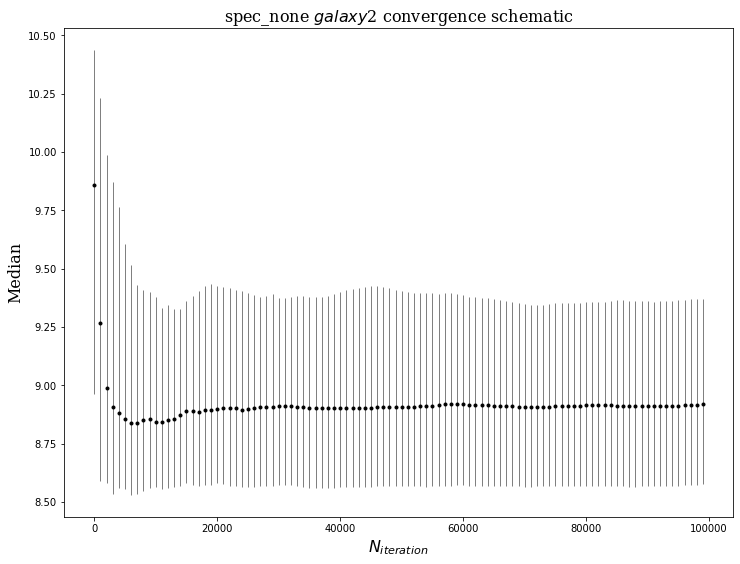

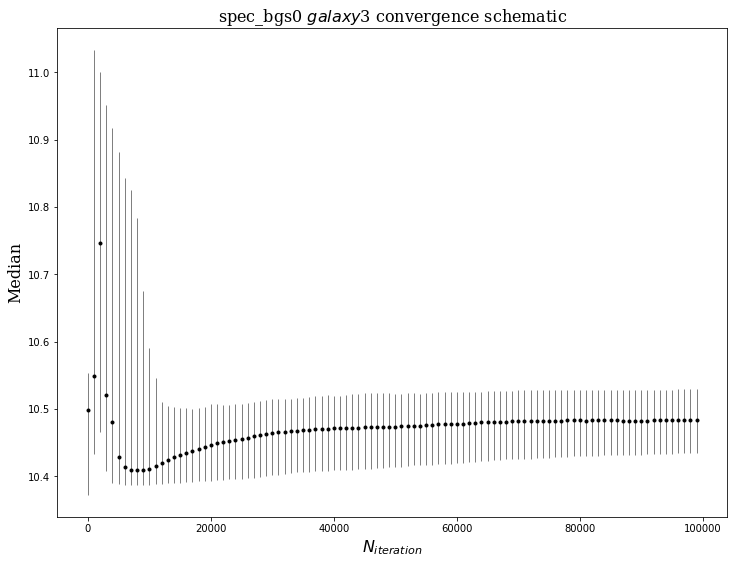

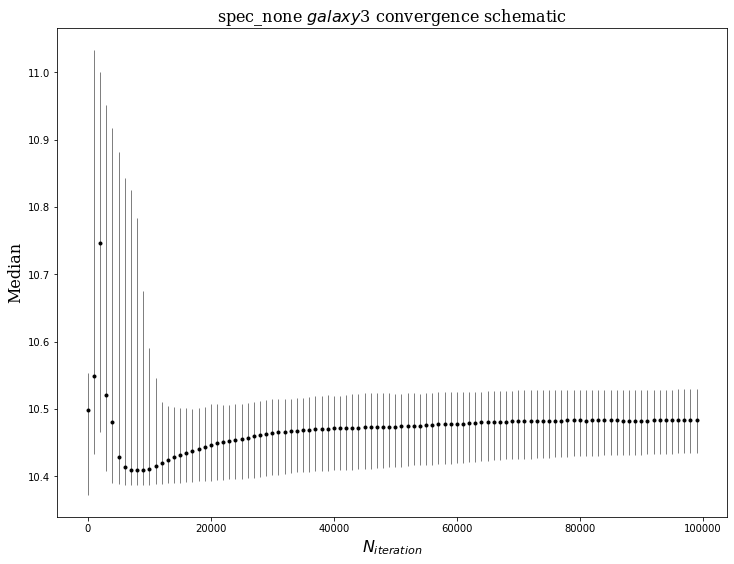

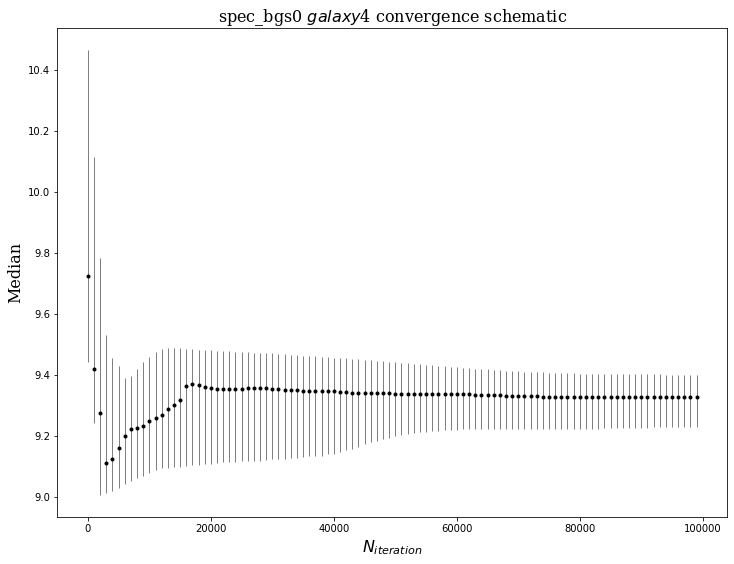

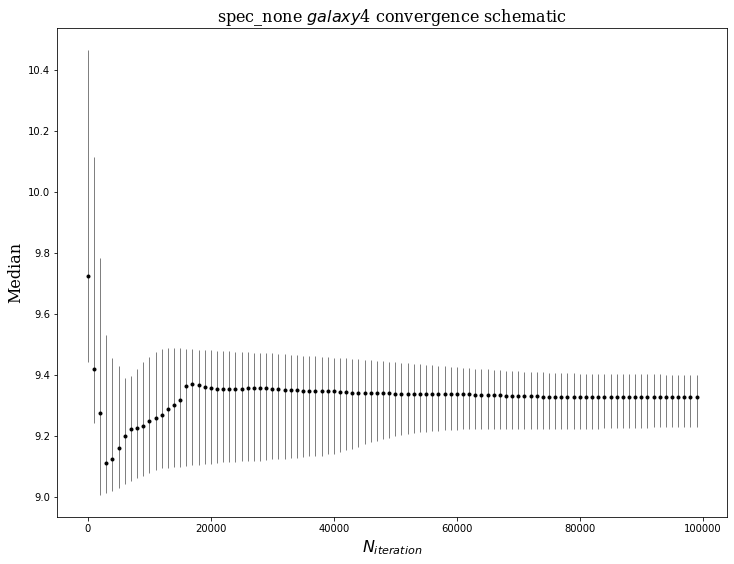

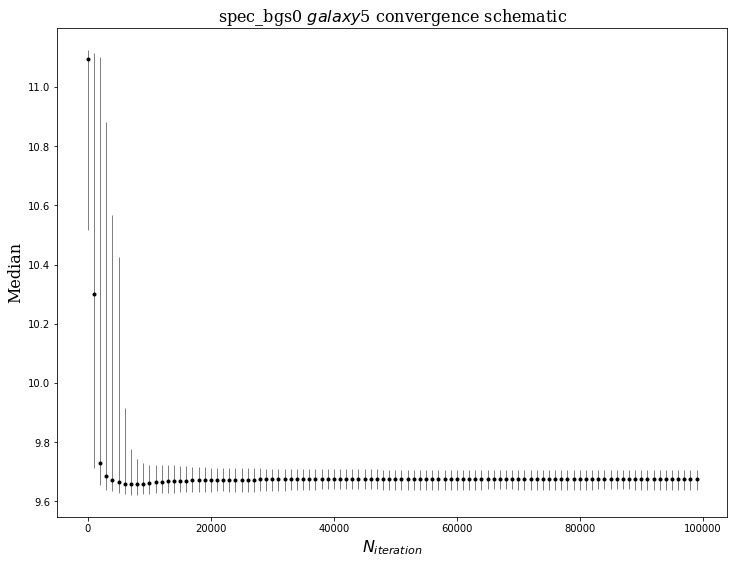

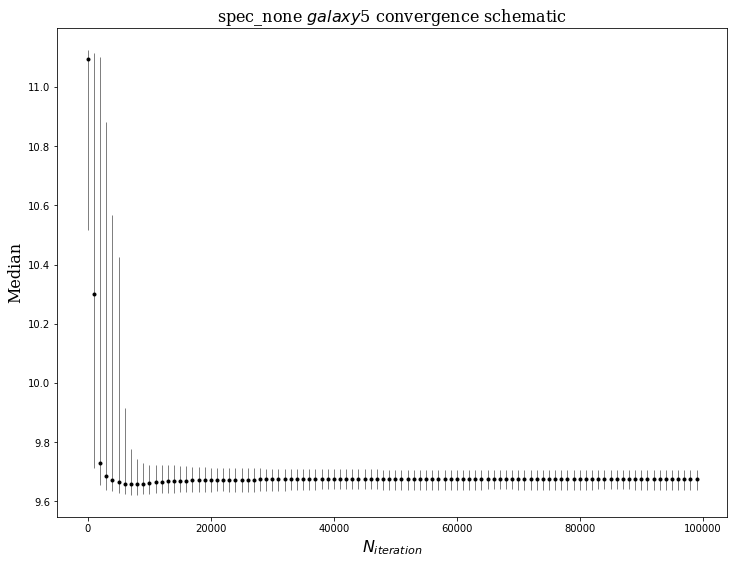

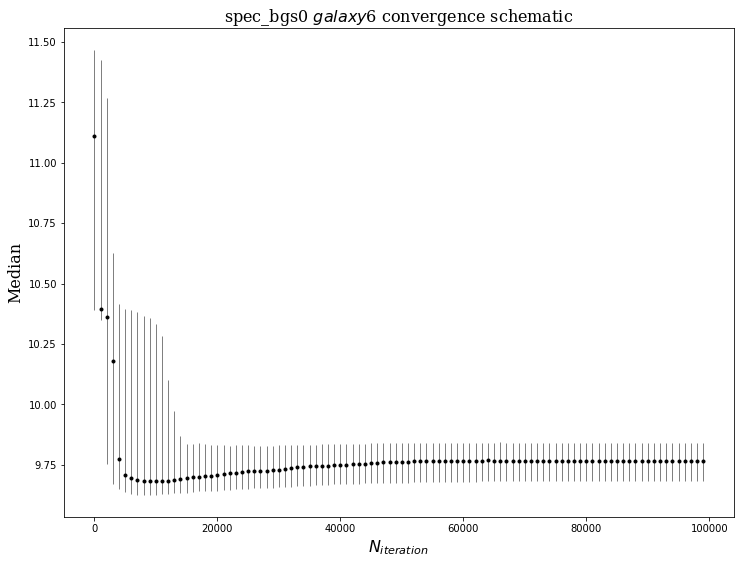

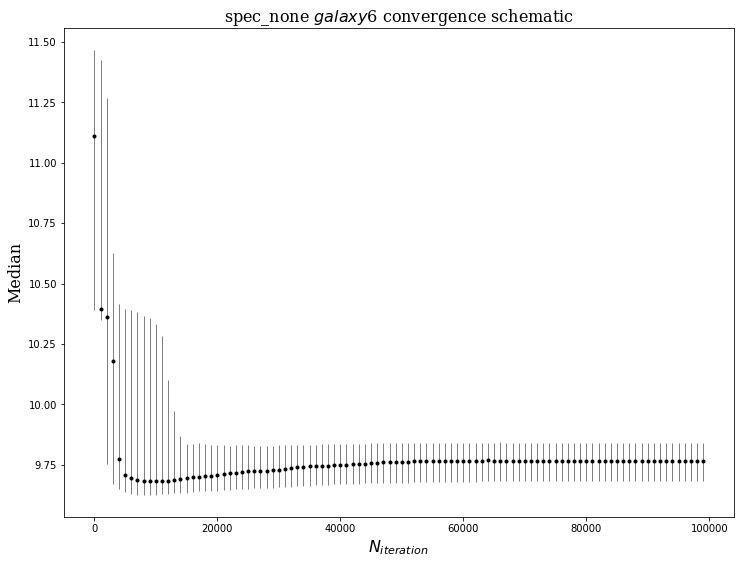

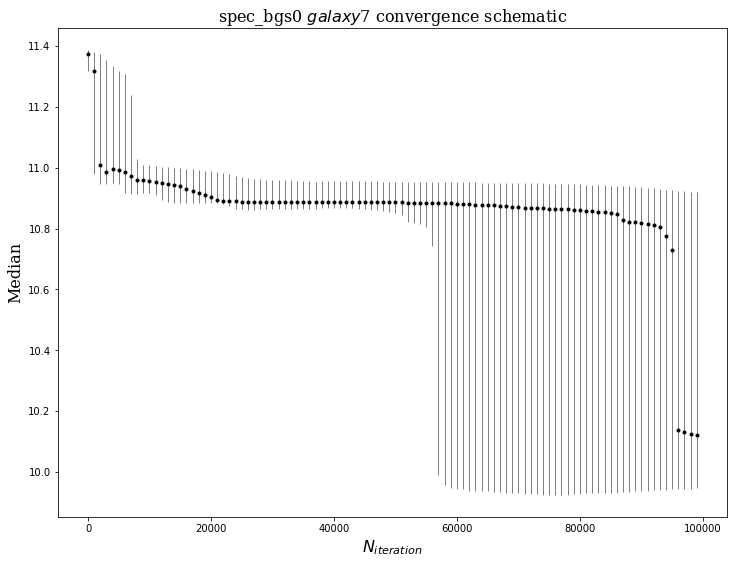

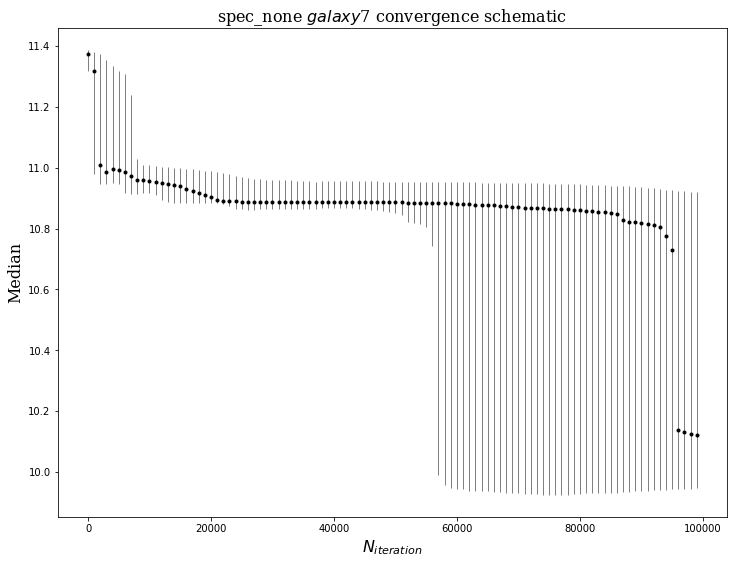

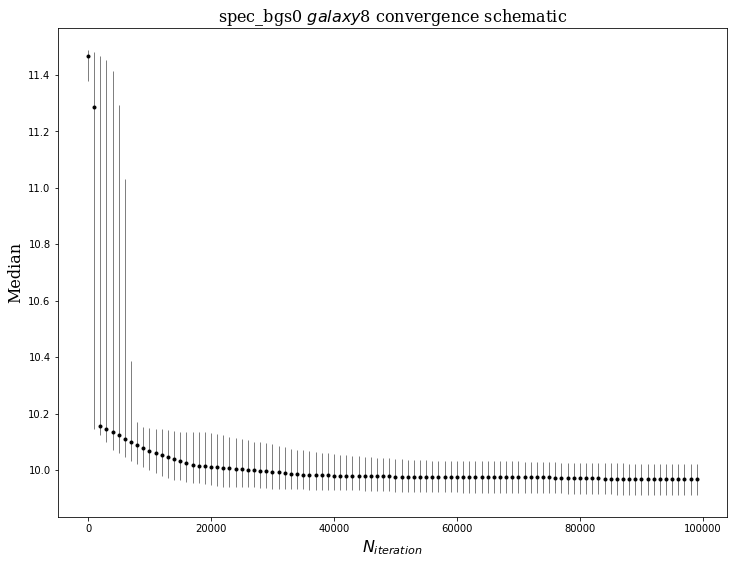

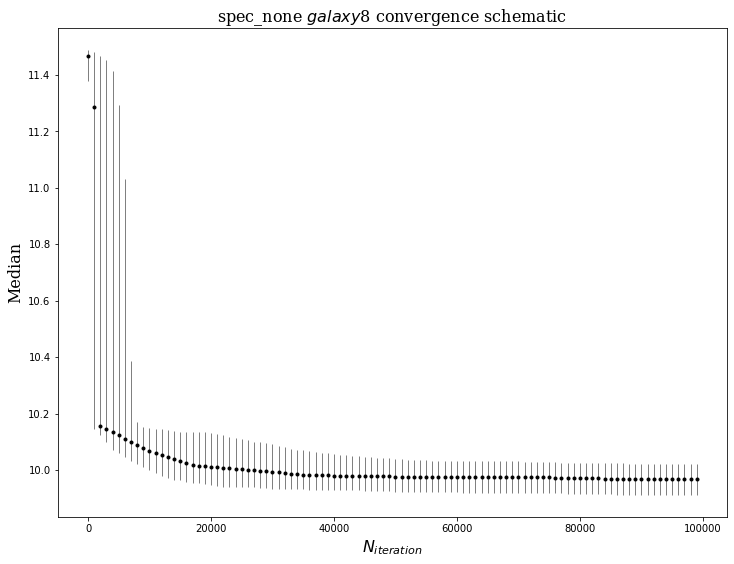

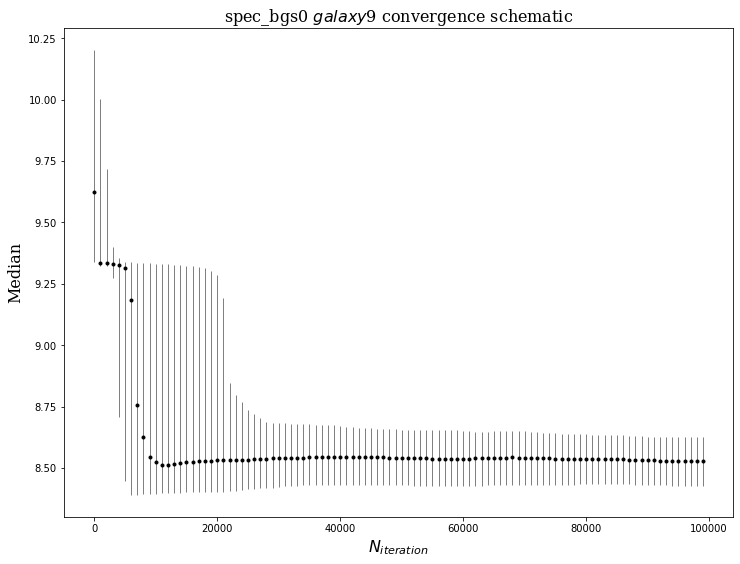

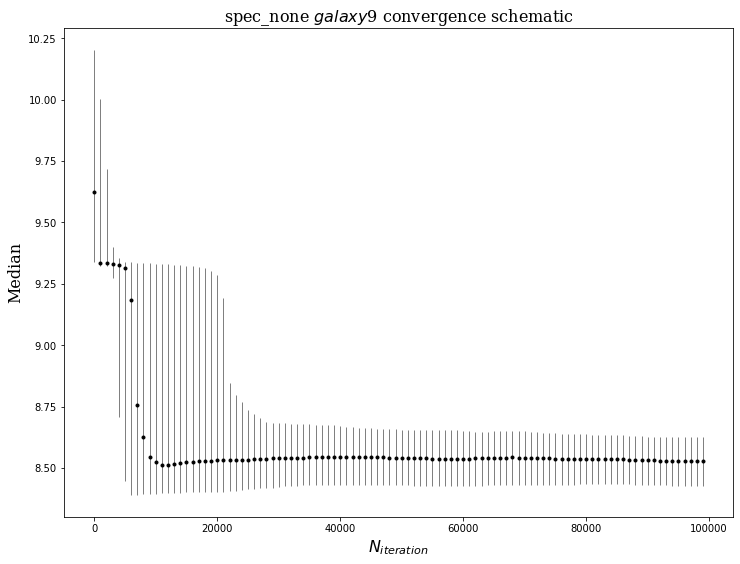

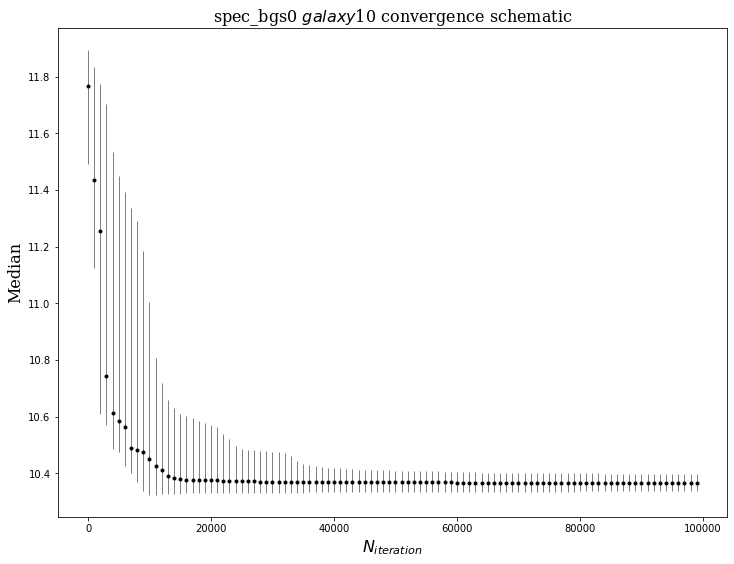

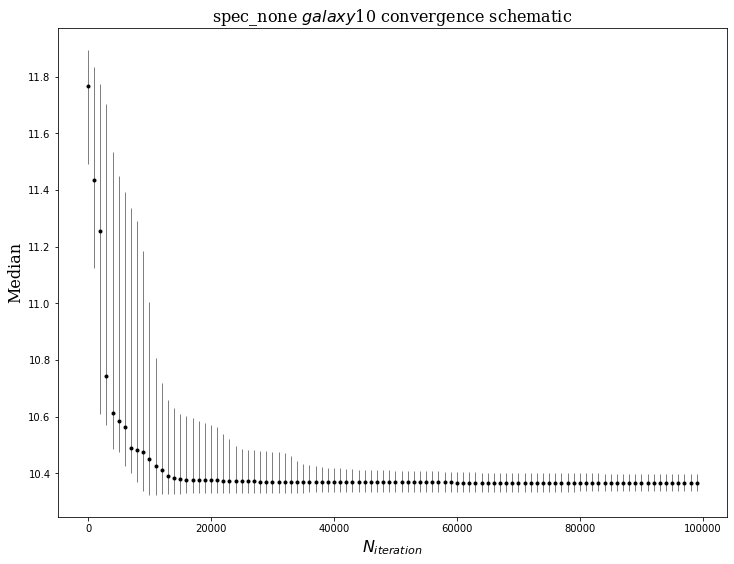

In [22]:
for idx in range(NUM_GAL):
    perc_plotter('spec_bgs0',idx+1,sb_mass[idx])
    perc_plotter('spec_none',idx+1,sb_mass[idx])

In [23]:
def GMD(sample,num_chain,length):
    M = num_chain
    N = length
    r_sample = np.reshape(sample,(M,N))
    
    means = [] #For E(X)
    sq_means = [] #For E(X^2)
    
    for m in r_sample:
        means.append(np.mean(m))
        sq_means.append(np.mean(m**2))

    tot_mean = np.mean(means) #The overall mean of the entire chains
    B = N*np.sum((means-tot_mean)**2)/(M-1) #between-chain variance
    W = np.sum(sq_means-np.square(means))/M #within-chain variance
    p_var = W*(N-1)/N+(M+1)*B/(M*N) #pooled variance
    PSRF = p_var/W
    return(PSRF)

In [24]:
for idx in range(NUM_GAL):
    print(GMD(sb_mass[idx],10,10000))

2.5481439748669854
1.0161191946747803
1.0240088291019878
1.0692419454116437
1.093300939652547
1.070564649770597
13.80860256786591
1.3836009062676187
1.3201282202670486
1.4272768178362556


In [25]:
f2 = h5py.File('/Users/jameskwon/Documents/Research/Data/gqp_mc/mini_mocha/ifsps/spec_bgs0_gal7/lgal.spec.noise_bgs0.vanilla.6.hdf5')

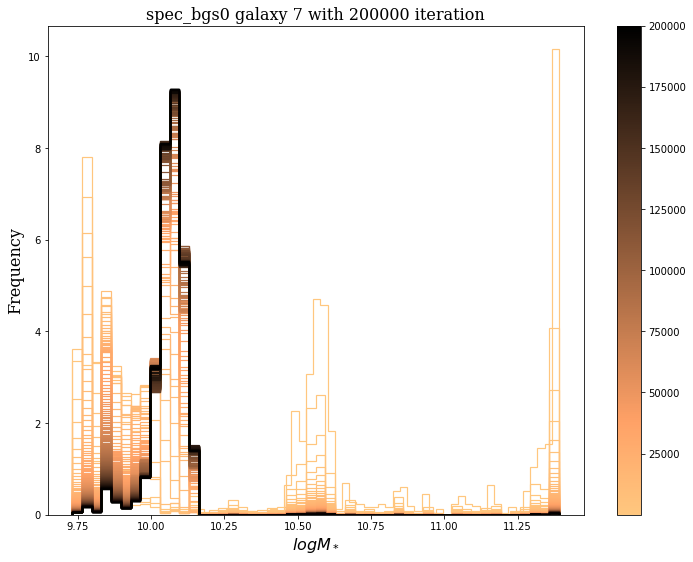

In [26]:
sb_mass_7=f2['mcmc_chain'][...][:,0]
plt.figure(figsize=(12,9))
N=100
step=1000
colors = plt.cm.copper_r(np.linspace(0,1,200))
for n in range(200):
    hist = plt.hist(sb_mass_7[:(1+n)*step],bins=50,histtype='step',color=colors[n],density='True',linewidth=1.2)
    plt.xlabel('$log M_*$',fontdict=font)
    plt.ylabel('Frequency',fontdict=font)
plt.title('spec_bgs0 galaxy 7 with 200000 iteration',fontdict=font)
norm = c.Normalize(vmin=1,vmax=200000)
cbar = plt.colorbar(cm.ScalarMappable(norm = norm, cmap=cm.copper_r))
    #plt.savefig(spec_photo + ' galaxy #' +str(gal_idx) +' histogram')
plt.show()

In [27]:
GMD(sb_mass_7,10,20000)

1.0464247764168448

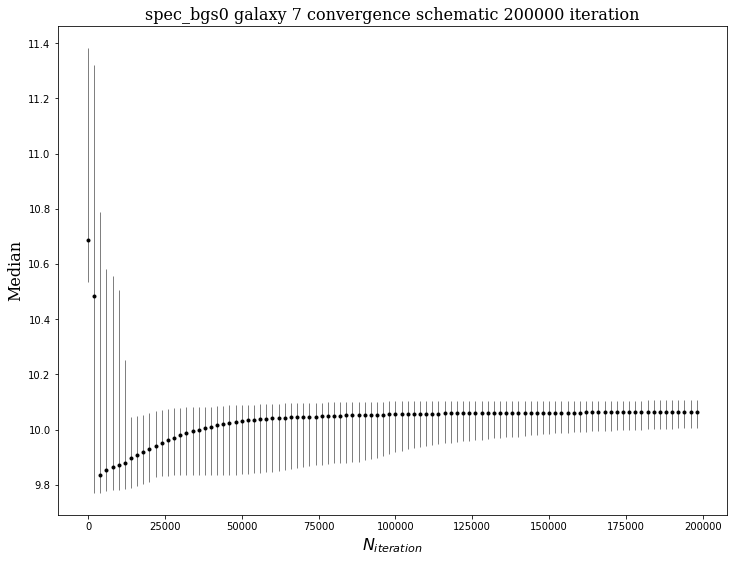

In [28]:
plt.figure(figsize=(12,9))
n_it = N_WALKERS*NUM_GAL
x_axis = np.arange(n_it)*2000
y,up_perc,lo_perc=[],[],[]
for n in range(NUM_GAL*N_WALKERS):
    up_perc.append(np.percentile(sb_mass_7[:step*(1+n)],84.1))
    lo_perc.append(np.percentile(sb_mass_7[:step*(1+n)],15.9))
    y.append(np.median(sb_mass_7[:step*(1+n)]))
        
up_perc = np.subtract(up_perc,y)
lo_perc = np.subtract(y,lo_perc)
yerr = np.vstack((lo_perc,up_perc))
plt.xlabel('$N_{iteration}$',fontdict=font)
plt.ylabel('Median',fontdict=font)
plt.title('spec_bgs0 galaxy 7 convergence schematic 200000 iteration', fontdict = font)
plt.errorbar(x_axis,y,yerr=yerr,fmt='.k',ecolor='gray', elinewidth=1)
plt.savefig('spec_bgs0 galaxy 7 convergence schematic 200000 iteration')
plt.show()